In [468]:
import pandas as pd
import numpy as np

In [469]:
import warnings
warnings.simplefilter('ignore')

In [470]:
data=pd.read_csv("insurance.csv")

In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


# Changing the data type for below columns to category from integer as they are not Numbers
## Biabetes
## Blood pressure
## Any Transplant
## Any chronic Diseases
## Allergies
## Cancer in Family
## Numer of sygeries


In [473]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [474]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [475]:
data['Diabetes']=data['Diabetes'].astype('category')
data['BloodPressureProblems']=data['BloodPressureProblems'].astype('category')
data['AnyTransplants']=data['AnyTransplants'].astype('category')
data['AnyChronicDiseases']=data['AnyChronicDiseases'].astype('category')
data['KnownAllergies']=data['KnownAllergies'].astype('category')
data['HistoryOfCancerInFamily']=data['HistoryOfCancerInFamily'].astype('category')
data['NumberOfMajorSurgeries']=data['NumberOfMajorSurgeries'].astype('category')

In [476]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


In [477]:
data.describe()

,Age,Height,Weight,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,24336.713996
std,13.963371,10.098155,14.265096,6248.184382
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,87.000000,28000.000000
max,66.000000,188.000000,132.000000,40000.000000


# Checking for Null Values

In [479]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

# There is no null Values in the data

# EDA VISUALS

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
columns_Req=['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

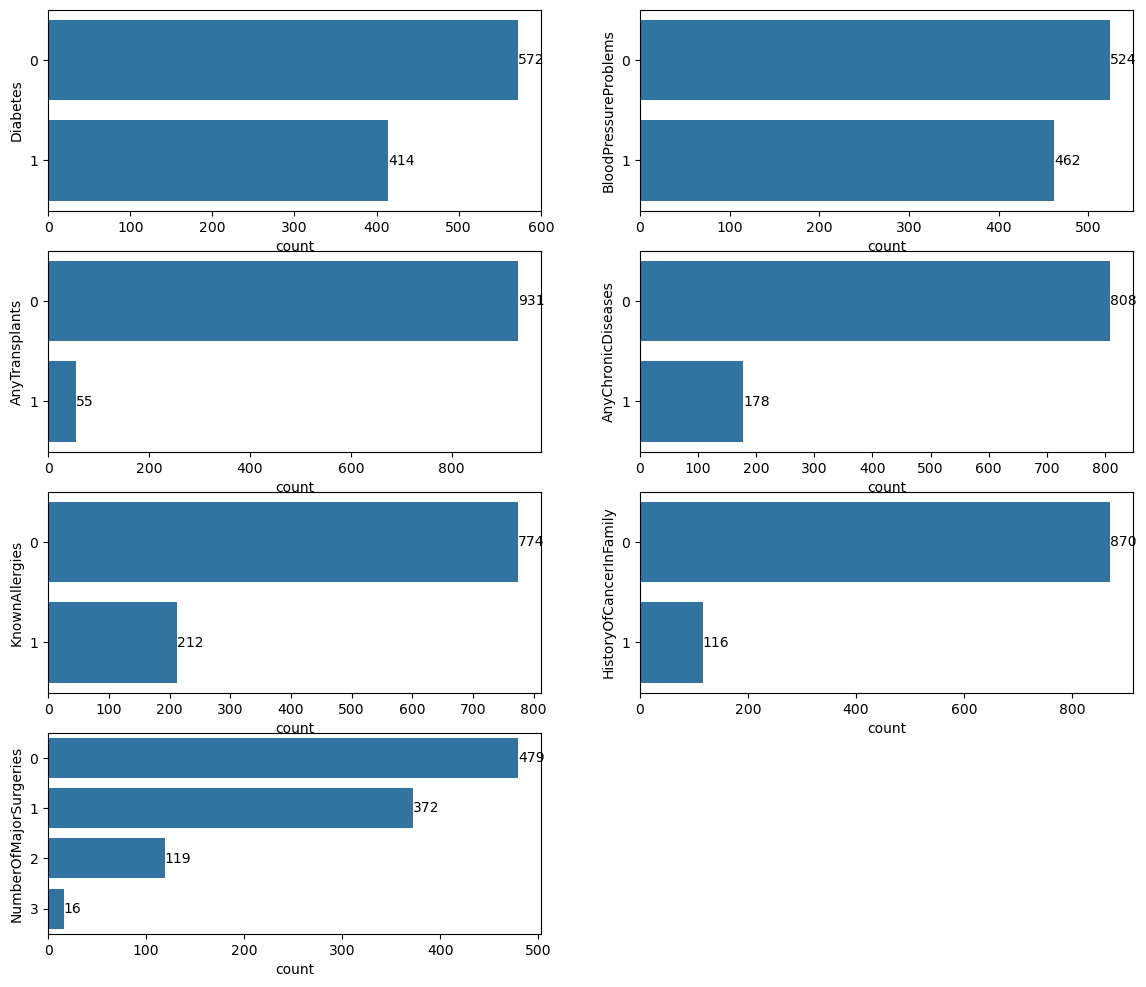

In [484]:
plt.figure(figsize=(14,12))

for n,i in enumerate(columns_Req):

    plt.subplot(4,2,n+1)
    ax=sns.countplot(data=data,y=i,orient='v',)
    for j in ax.containers:
        plt.bar_label(j,)
plt.show()
    

# Age Distribution Plot

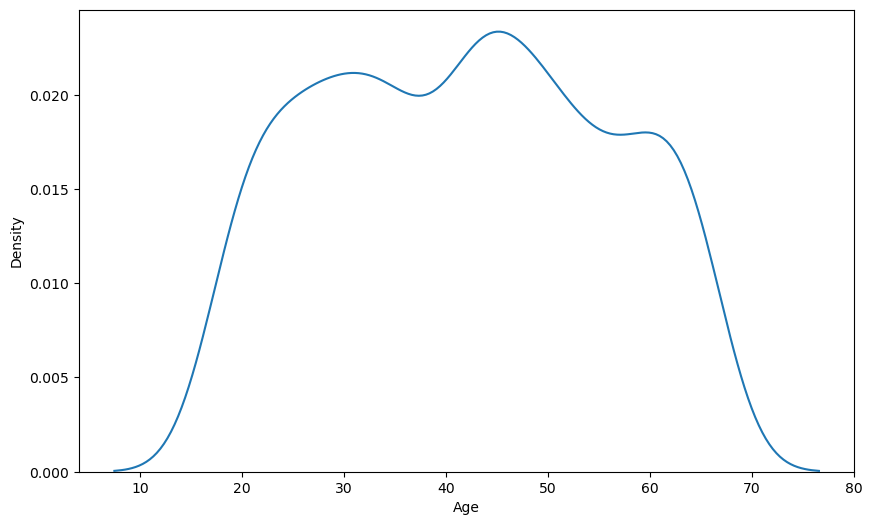

In [486]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data,x='Age')
plt.show()

# Creating Age Bucket

In [488]:
def Age_Bucket(a):
    if a<=30:
        return "less 30 Yrs"
    elif (a>30) & (a<=40):
        return "31-40 Yrs"
    elif (a>41) & (a<=50):
        return "41-50 Yrs"
    elif (a>51) & (a<=55):
        return "51-55 Yrs"
    else:
        return "greater 55 Yrs"

In [489]:
data['Age_Bucket']=data['Age'].apply(Age_Bucket)

In [490]:
data['Age_Bucket'].unique()

array(['41-50 Yrs', 'greater 55 Yrs', '31-40 Yrs', '51-55 Yrs',
       'less 30 Yrs'], dtype=object)

# Average Premium Price for different bucket group 

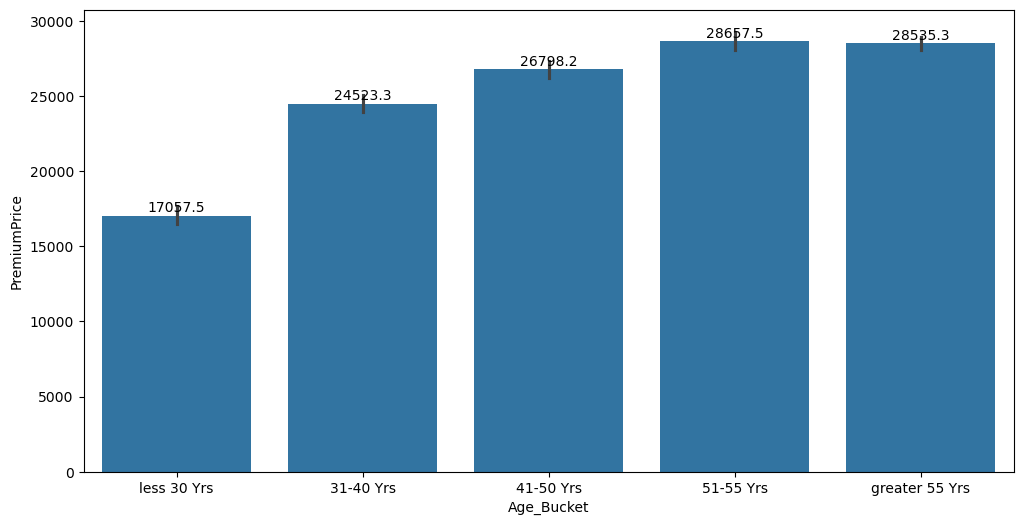

In [492]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=data,x='Age_Bucket',y='PremiumPrice',order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
for i in ax.containers:
    plt.bar_label(i,padding=0.5)
plt.show()

# As the chart suggests the insurance premium price increases with the increase in individual Age

# Price Distribution Plot

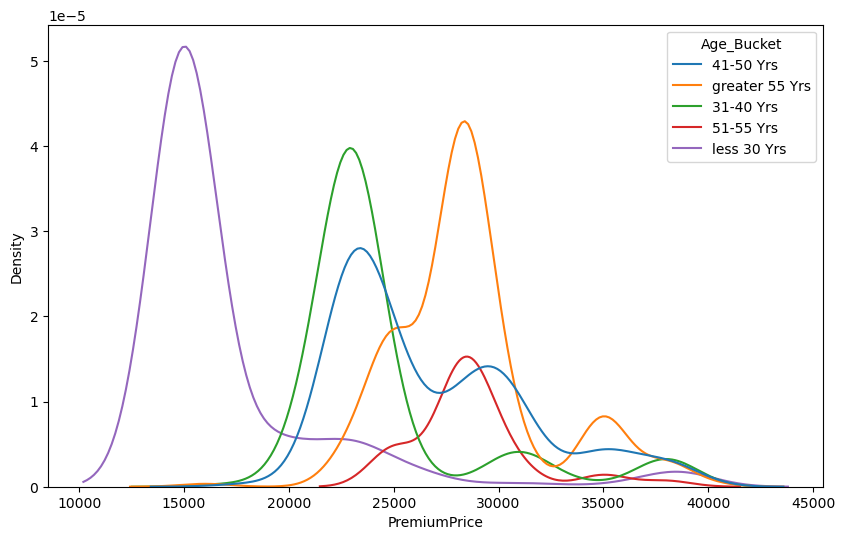

In [495]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data,x='PremiumPrice',hue='Age_Bucket')
plt.show()

# Avergare Premium Price for different health condition

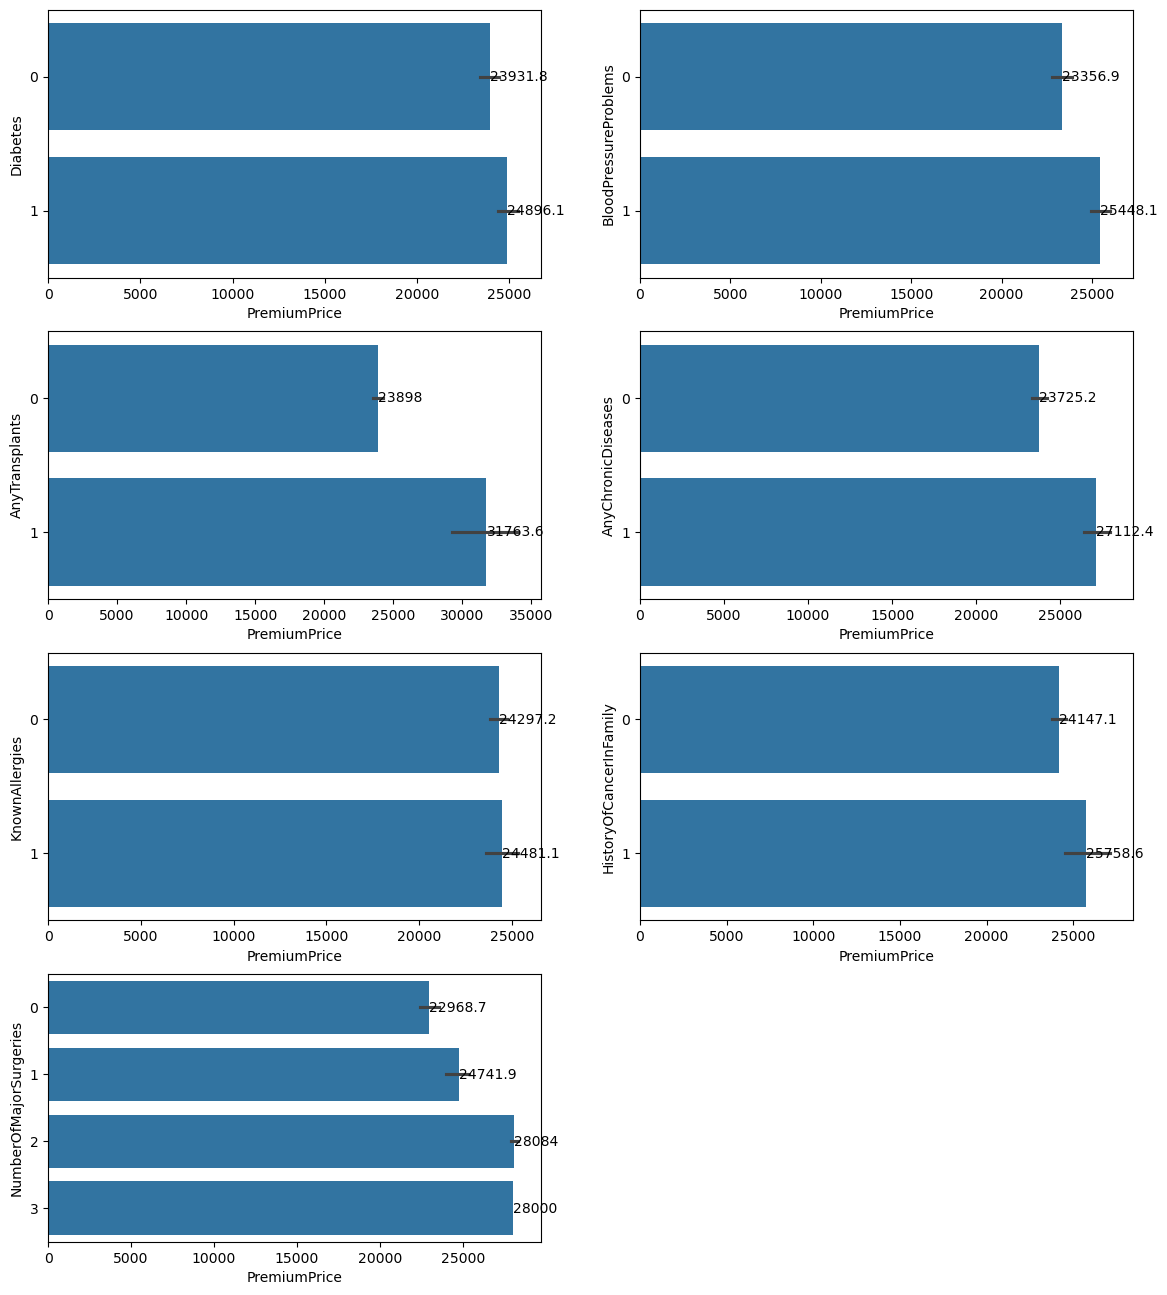

In [497]:
plt.figure(figsize=(14,16))

for n,i in enumerate(columns_Req):

    plt.subplot(4,2,n+1)
    ax=sns.barplot(data=data,y=i,orient='h',x='PremiumPrice',estimator='mean')
    for j in ax.containers:
        plt.bar_label(j,)
plt.show()

# Visual clearly explains the premium gets hike if the health condition is not ideal

# Box Plot 

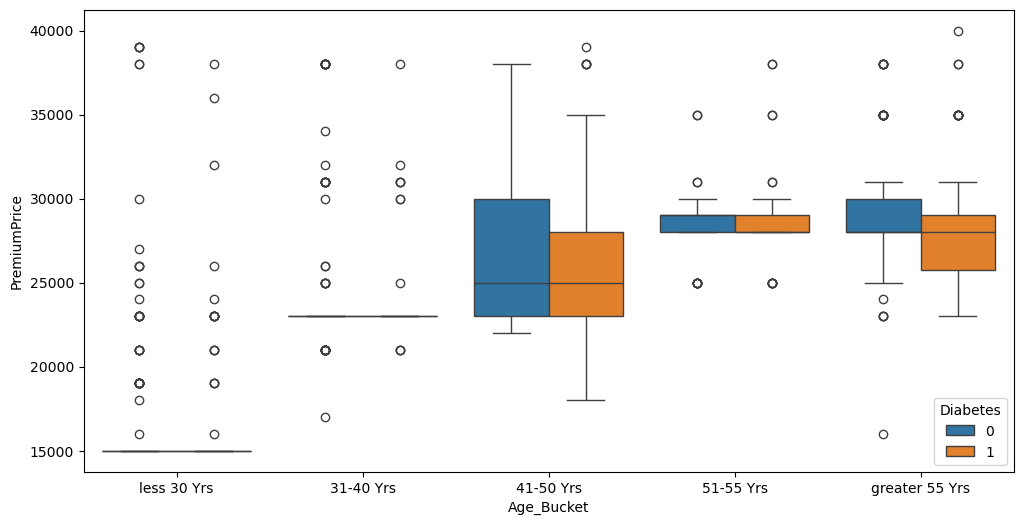

In [500]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='Diabetes',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

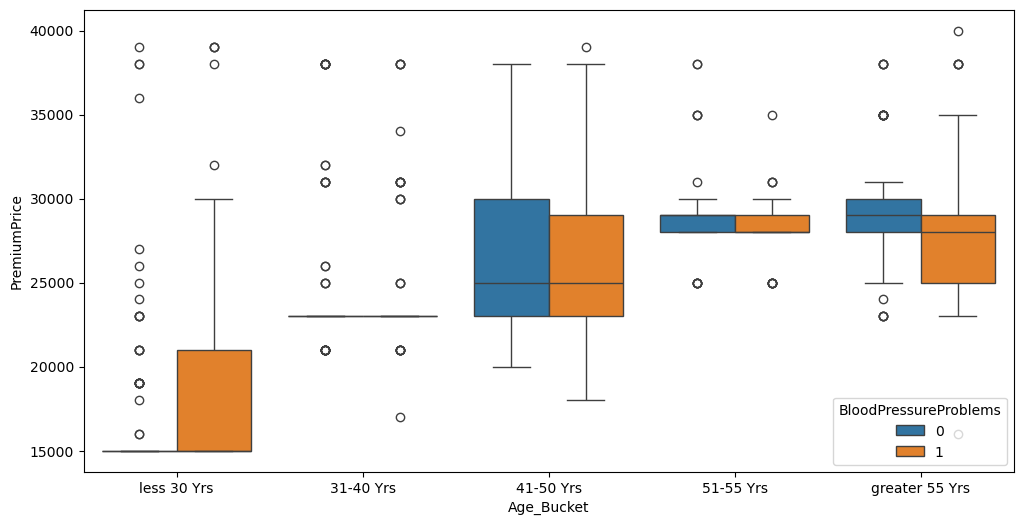

In [501]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='BloodPressureProblems',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

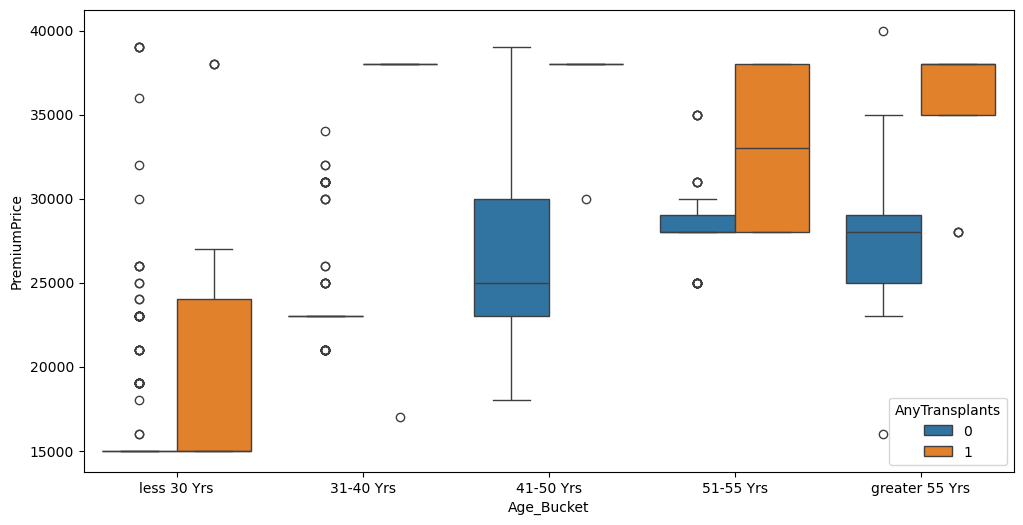

In [502]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='AnyTransplants',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

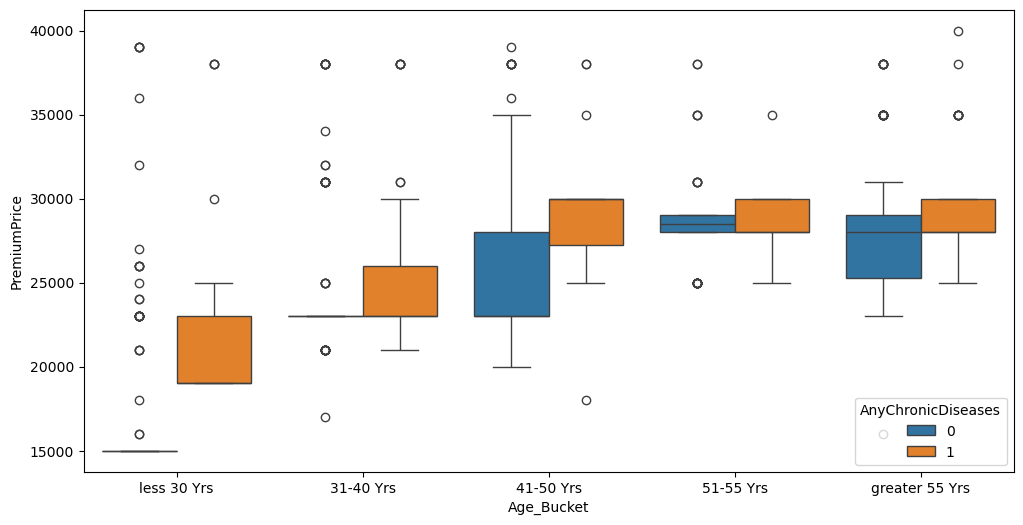

In [503]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='AnyChronicDiseases',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

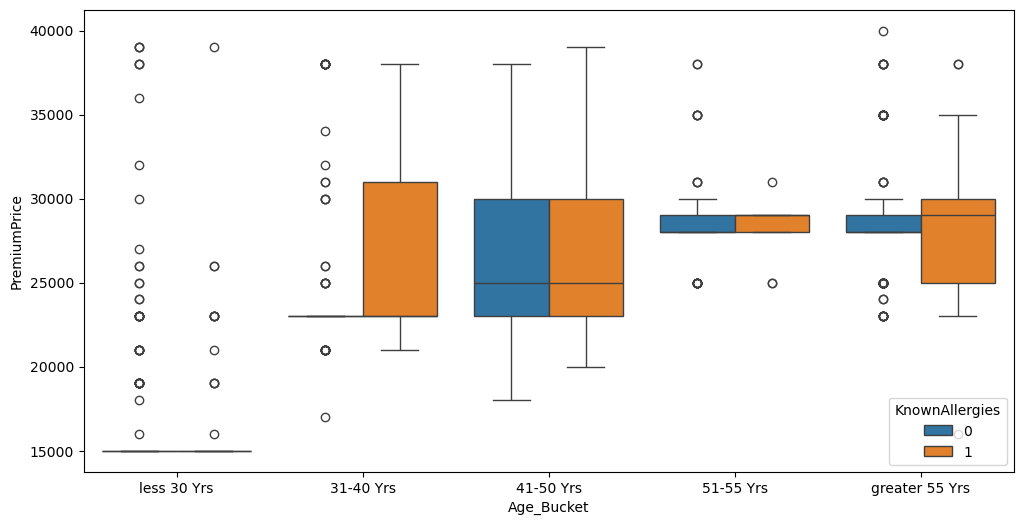

In [504]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='KnownAllergies',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

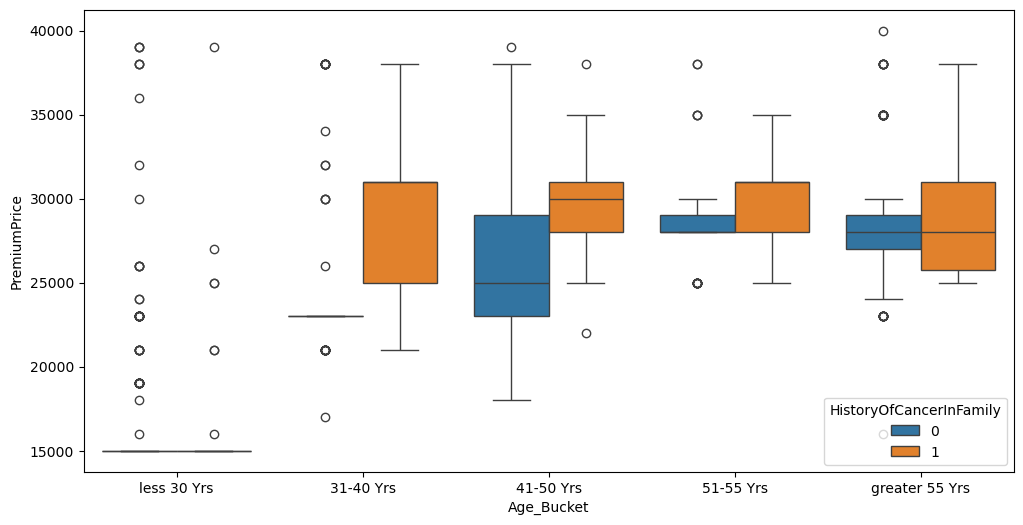

In [505]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='HistoryOfCancerInFamily',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

# Identify whether a person has any issue or not

In [507]:
data['Healthy?']=(data[columns_Req]==0).all(axis=1).astype('int')

In [508]:
data['Healthy?'].value_counts()

Healthy?
0    853
1    133
Name: count, dtype: int64

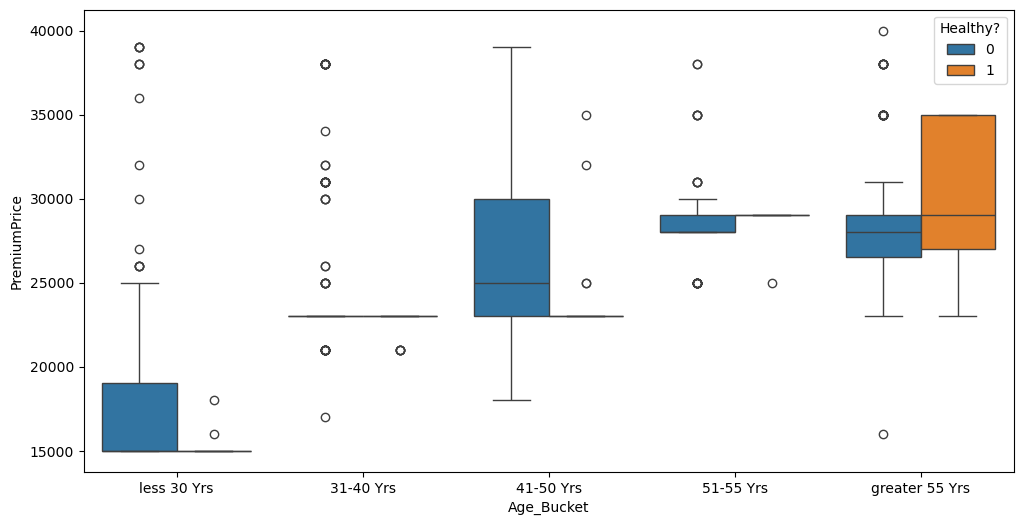

In [509]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,y='PremiumPrice',x='Age_Bucket',hue='Healthy?',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

# Based on box Plot for different age bucket, we can clearly see we have outliers in the data

# Before we check the data for outlier, we will split the data into train, val & test to avoid any data leakage

In [512]:
from sklearn.model_selection import train_test_split

In [513]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Age_Bucket', 'Healthy?'],
      dtype='object')

In [514]:
X=data[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [515]:
y=data['PremiumPrice']

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [517]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(887, 10)
(99, 10)
(887,)
(99,)


In [518]:
train_X, X_val,train_y, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [519]:
print(train_X.shape)
print(X_val.shape)
print(train_y.shape)
print(y_val.shape)

(798, 10)
(89, 10)
(798,)
(89,)


# Outlier detection work

## we standarize the train data

In [522]:
from sklearn.preprocessing import StandardScaler

# LOF Technique to detect outlier

In [524]:
train_data=train_X.copy()

In [525]:
train_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
975,44,0,1,0,0,161,75,0,0,0
105,33,1,0,0,0,168,68,0,0,0
75,66,1,1,0,0,161,75,0,0,2
458,61,1,0,0,0,178,71,0,0,3
626,28,0,0,0,1,180,86,0,0,0
...,...,...,...,...,...,...,...,...,...,...
568,66,0,1,0,1,169,91,0,1,1
456,19,1,0,0,0,183,70,1,1,1
805,29,1,0,0,0,178,78,0,0,0
271,62,1,1,0,0,181,82,0,0,2


In [526]:
scale_train=StandardScaler()

In [527]:
train_scaled=scale_train.fit_transform(train_data)

In [528]:
train_scaled

array([[ 0.16075891, -0.87939373,  1.1086254 , ..., -0.53581412,
        -0.3543006 , -0.87663438],
       [-0.62277341,  1.13714707, -0.90201794, ..., -0.53581412,
        -0.3543006 , -0.87663438],
       [ 1.72782355,  1.13714707,  1.1086254 , ..., -0.53581412,
        -0.3543006 ,  1.76818313],
       ...,
       [-0.90769425,  1.13714707, -0.90201794, ..., -0.53581412,
        -0.3543006 , -0.87663438],
       [ 1.44290271,  1.13714707,  1.1086254 , ..., -0.53581412,
        -0.3543006 ,  1.76818313],
       [-0.76523383, -0.87939373,  1.1086254 , ..., -0.53581412,
        -0.3543006 , -0.87663438]])

In [529]:
from sklearn.neighbors import LocalOutlierFactor

In [530]:
clf=LocalOutlierFactor(contamination=0.1,n_neighbors=40)

In [531]:
train_data['outlier?']=clf.fit_predict(train_scaled)

In [532]:
train_data['outlier?'].value_counts()

outlier?
 1    718
-1     80
Name: count, dtype: int64

In [533]:
train_data[train_data['outlier?']==-1]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,outlier?
439,65,0,1,1,0,179,58,0,0,1,-1
483,64,0,1,0,1,180,60,1,1,1,-1
650,40,1,0,0,0,166,101,1,0,0,-1
151,47,0,0,0,0,169,116,0,0,1,-1
922,33,0,0,1,0,162,70,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
218,62,0,1,1,0,164,121,1,0,1,-1
74,53,1,0,0,0,154,54,0,0,2,-1
101,45,1,0,1,0,152,91,0,0,0,-1
762,19,0,0,0,0,146,55,0,0,0,-1


# We use TSNE to see the visualization

In [535]:
from sklearn.manifold import TSNE

In [536]:
tsne = TSNE(n_components=2, perplexity=45, random_state=42)
X_tsne = tsne.fit_transform(train_scaled)

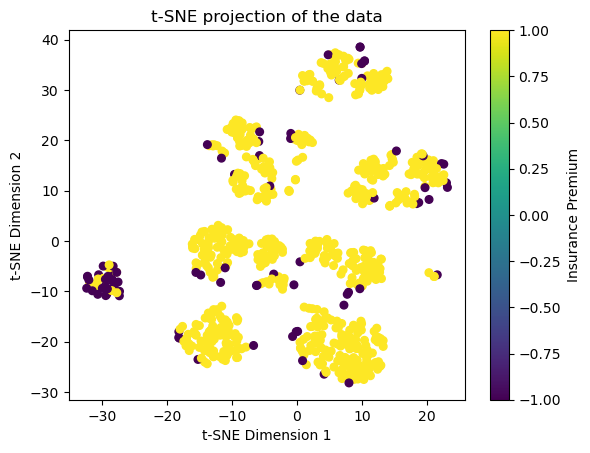

In [537]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_data['outlier?'], cmap='viridis', s=30)
plt.colorbar(label='Insurance Premium')
plt.title('t-SNE projection of the data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [538]:
train_data['Healthy?']=(train_data[columns_Req]==0).all(axis=1).astype('int')

In [539]:
train_data['Age_Bucket']=train_data['Age'].apply(Age_Bucket)

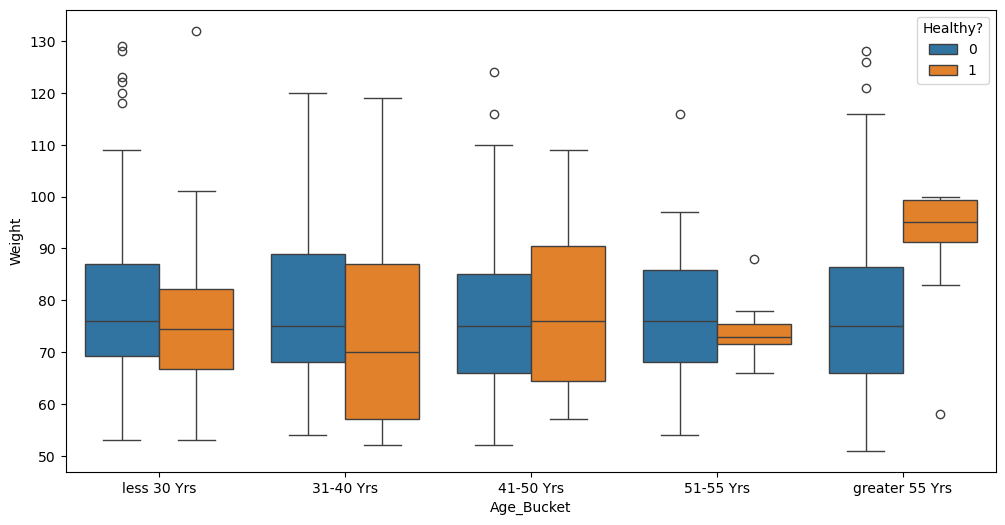

In [540]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data,y='Weight',x='Age_Bucket',hue='Healthy?',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

In [541]:
def median_metric():
    q1 = train_data.groupby('Age_Bucket')['Weight'].quantile(0.25)
    q3 = train_data.groupby('Age_Bucket')['Weight'].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound=q1-1.5*iqr
    median_weights = train_data.groupby('Age_Bucket')['Weight'].median()
    return {"upper":upper_bound.to_dict(),"lower":lower_bound.to_dict(),"median_weight":median_weights.to_dict}

In [542]:
def weight_height_outlier(a):
    # Calculating the IQR, Upper & lower bound for Weights
    q1_Weight = a.groupby('Age_Bucket')['Weight'].transform(lambda x: x.quantile(0.25))
    q3_Weight = a.groupby('Age_Bucket')['Weight'].transform(lambda x: x.quantile(0.75))
    iqr_Weight = q3_Weight - q1_Weight
    upper_bound = q3_Weight + 1.5 * iqr_Weight
    lower_bound=q1_Weight-1.5*iqr_Weight
    # Calculating the IQR, Upper & lower bound for Heights
    q1_Height = a.groupby('Age_Bucket')['Height'].transform(lambda x: x.quantile(0.25))
    q3_Height = a.groupby('Age_Bucket')['Height'].transform(lambda x: x.quantile(0.75))
    iqr_Height = q3_Height - q1_Height
    upper_bound_H = q3_Height + 1.5 * iqr_Height
    lower_bound_H=q1_Height-1.5*iqr_Height
    
    # Calculating the Median Height
    median_Height = a.groupby('Age_Bucket')['Height'].transform('median')
    
    #CAlculating the Median Weight
    median_weights = a.groupby('Age_Bucket')['Weight'].transform('median')
    
    a['Weight']=a['Weight'].where(~((a['outlier?']==-1) & ((a['Weight']>upper_bound) | (a['Weight']<lower_bound))),median_weights)
    
    
    a['Height']=a['Height'].where(~((a['outlier?']==-1) & ((a['Height']>upper_bound_H) | (a['Height']<lower_bound_H))),median_Height)
    
    return a

In [543]:
train_data=weight_height_outlier(train_data)

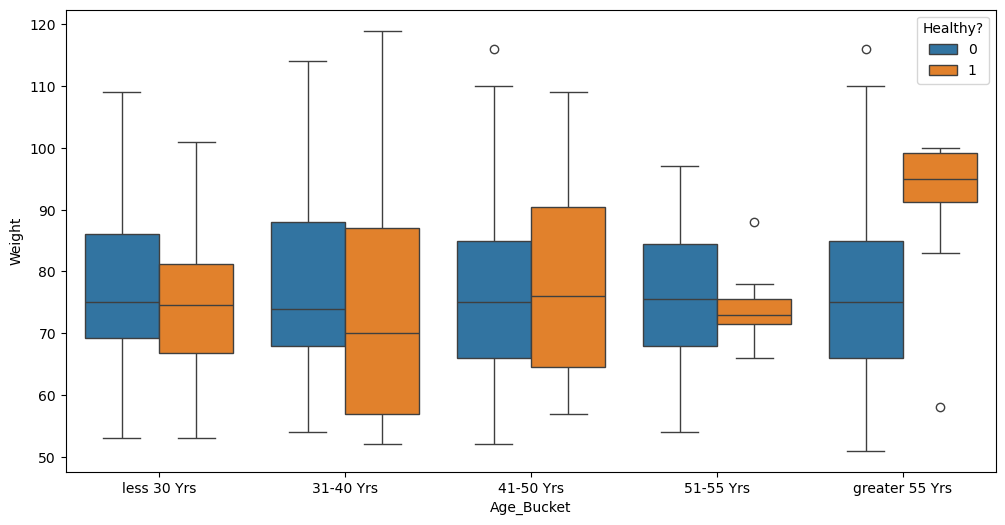

In [544]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data,y='Weight',x='Age_Bucket',hue='Healthy?',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

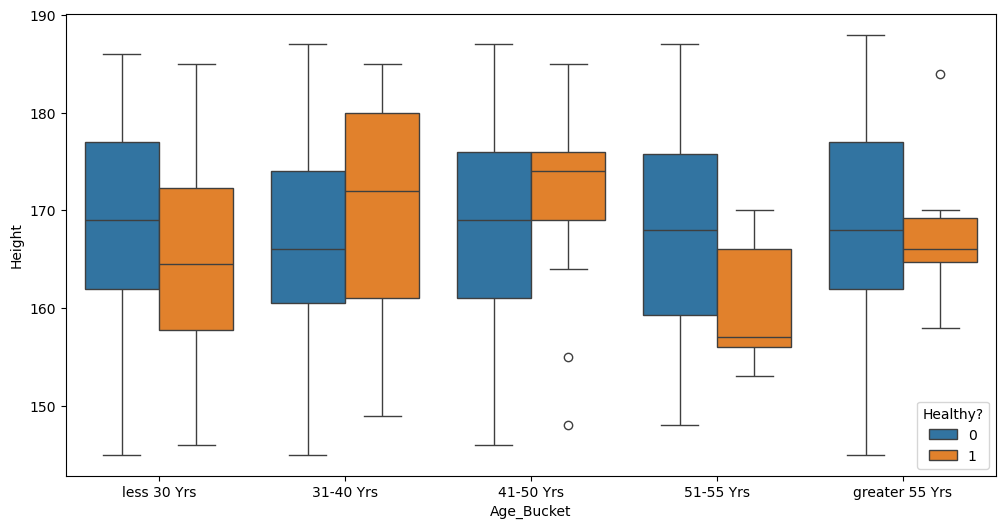

In [545]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data,y='Height',x='Age_Bucket',hue='Healthy?',\
            order=['less 30 Yrs','31-40 Yrs','41-50 Yrs','51-55 Yrs','greater 55 Yrs'])
plt.show()

In [546]:
revised_train=pd.concat([train_data,train_y],axis=1).reset_index(drop=True)

In [547]:
revised_train.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'outlier?',
       'Healthy?', 'Age_Bucket', 'PremiumPrice'],
      dtype='object')

# Business Assumption

### Based on the EDA, we understood that Insurance Premium has outlier, which may screw our model.

### To Fix the training data, we need to clip the Insurance premium.

### In order to do, we need pick the input feature which add more weightage for prediction

### we use base model (Linear Regression Model) to get the important feature.

In [549]:
from sklearn.linear_model import LinearRegression

In [550]:
revised_X=revised_train[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [551]:
revised_y=revised_train['PremiumPrice']

In [552]:
scale=StandardScaler()

In [553]:
revised_X_scale=scale.fit_transform(revised_X)

In [554]:
base_model=LinearRegression()

In [555]:
base_outcome=base_model.fit(revised_X_scale,revised_y)

In [556]:
base_outcome.score(revised_X_scale,revised_y)

0.6335739727817451

In [557]:
base_outcome.coef_

array([4534.82748481, -273.96645364,   39.4326408 , 1837.22489173,
        911.35387492, -159.79948084, 1007.16585442,   32.19835706,
        730.3323774 , -486.22934526])

### Based on base model, below are the order of highly important features
### Age
### Any Transplant
### chronic disease
### Cancer History
### BP
### Allergies
### Diabetes
### Major Surgeries

## Using above features we will try to clip the insurance premium

In [559]:
target_dict={}
list_col=['Healthy?','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries','Diabetes',\
          'BloodPressureProblems','KnownAllergies']

for name in list_col:
    temp_df=revised_train[revised_train[name]==1]
    q1 = temp_df.groupby('Age_Bucket')['PremiumPrice'].quantile(0.25)
    q3 = temp_df.groupby('Age_Bucket')['PremiumPrice'].quantile(0.75)
    median_avl=temp_df.groupby('Age_Bucket')['PremiumPrice'].median()
    iqr = q3-q1
    upper = q3 +(1.5 * iqr)
    lower = q1-(1.5*iqr)
    target_dict[name]={'upper':upper,'lower':lower,'median_avl':median_avl}



In [560]:
target_dict

{'Healthy?': {'upper': Age_Bucket
  31-40 Yrs         23000.0
  41-50 Yrs         23000.0
  51-55 Yrs         29000.0
  greater 55 Yrs    44000.0
  less 30 Yrs       15000.0
  Name: PremiumPrice, dtype: float64,
  'lower': Age_Bucket
  31-40 Yrs         23000.0
  41-50 Yrs         23000.0
  51-55 Yrs         29000.0
  greater 55 Yrs    20000.0
  less 30 Yrs       15000.0
  Name: PremiumPrice, dtype: float64,
  'median_avl': Age_Bucket
  31-40 Yrs         23000.0
  41-50 Yrs         23000.0
  51-55 Yrs         29000.0
  greater 55 Yrs    32000.0
  less 30 Yrs       15000.0
  Name: PremiumPrice, dtype: float64},
 'AnyTransplants': {'upper': Age_Bucket
  31-40 Yrs         38000.0
  41-50 Yrs         38000.0
  51-55 Yrs         53000.0
  greater 55 Yrs    42500.0
  less 30 Yrs       58750.0
  Name: PremiumPrice, dtype: float64,
  'lower': Age_Bucket
  31-40 Yrs         38000.0
  41-50 Yrs         38000.0
  51-55 Yrs         13000.0
  greater 55 Yrs    30500.0
  less 30 Yrs      -11250.0
  

In [561]:
def replace_outliers(row):
    conditions = [
        'Healthy?', 'AnyTransplants', 'AnyChronicDiseases', 
        'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 
        'Diabetes', 'BloodPressureProblems', 'KnownAllergies']

    for condition in conditions:
        if row[condition] == 1:
            age_bucket = row['Age_Bucket']
            upper = target_dict[condition]['upper'][age_bucket]
            lower = target_dict[condition]['lower'][age_bucket]
            median = target_dict[condition]['median_avl'][age_bucket]
            
            # Return median if PremiumPrice is outside the bounds
            return median if (row['PremiumPrice'] > upper or row['PremiumPrice'] < lower) else row['PremiumPrice']
    
    # If none of the conditions match, return the original PremiumPrice
    return row['PremiumPrice']

In [562]:
def replace_outliers1(row):
    conditions = [
        'AnyTransplants', 'AnyChronicDiseases', 
        'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 
        'Diabetes', 'BloodPressureProblems', 'KnownAllergies']

    if (row['Healthy?']==1) & (row['outlier?']==-1):
        age_bucket = row['Age_Bucket']
        upper = target_dict['Healthy?']['upper'][age_bucket]
        lower = target_dict['Healthy?']['lower'][age_bucket]
        median = target_dict['Healthy?']['median_avl'][age_bucket]
            
        return median if (row['PremiumPrice'] > upper or row['PremiumPrice'] < lower) else row['PremiumPrice']
    
    elif row['outlier?']==-1:
        
        lookup_list=list(filter(lambda x:row[x]!=0,conditions))
        refiil_val=[]
        for condition_fil in lookup_list:
                
            if (row[condition_fil]!=0):
                age_bucket = row['Age_Bucket']
                upper = target_dict[condition_fil]['upper'][age_bucket]
                lower = target_dict[condition_fil]['lower'][age_bucket]
                median = target_dict[condition_fil]['median_avl'][age_bucket]
                    
                append_val=median if (row['PremiumPrice'] > upper or row['PremiumPrice'] < lower) else row['PremiumPrice']
                refiil_val.append(append_val)    

            # Return max median value if PremiumPrice is outside the bounds based oll the condition:
#         print(refiil_val,lookup_list)
        return max(refiil_val)             
        
    # If none of the conditions match, return the original PremiumPrice
    return row['PremiumPrice']               

In [563]:
revised_train['PremiumPrice']=revised_train.apply(replace_outliers1, axis=1)

In [564]:
outlier_check=revised_train[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [565]:
outlier=StandardScaler()

In [566]:
outlier_scaled=outlier.fit_transform(outlier_check)

In [567]:
outlier_corrected=tsne.fit_transform(outlier_scaled)

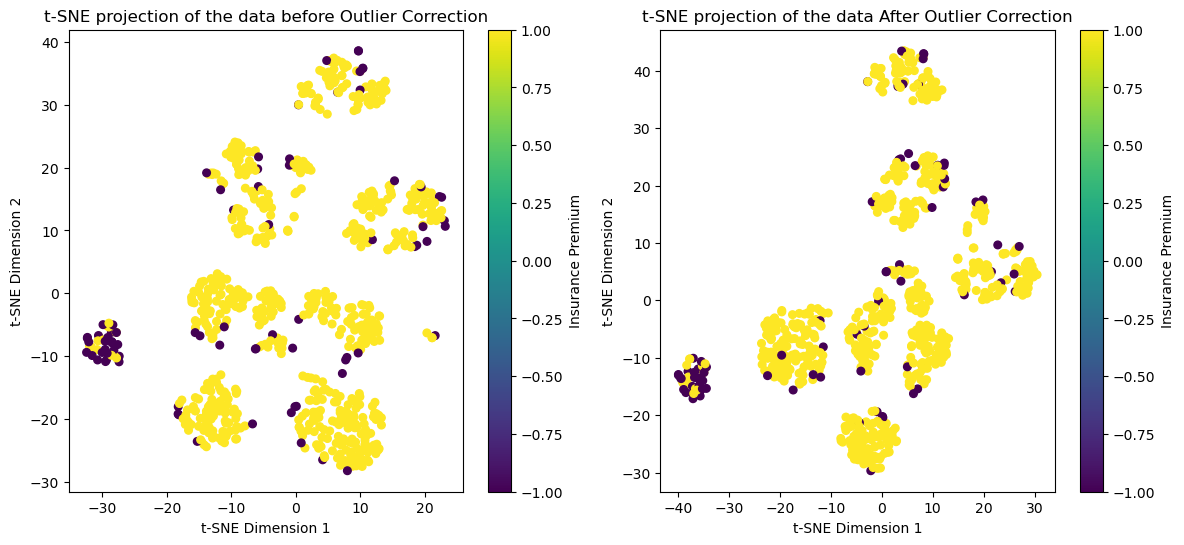

In [568]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Before Outlier Treatment')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_data['outlier?'], cmap='viridis', s=30)
plt.colorbar(label='Insurance Premium')
plt.title('t-SNE projection of the data before Outlier Correction')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1,2,2)


plt.scatter(outlier_corrected[:, 0], outlier_corrected[:, 1], c=train_data['outlier?'], cmap='viridis', s=30)
plt.colorbar(label='Insurance Premium')
plt.title('t-SNE projection of the data After Outlier Correction')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


plt.show()

## After outlier treatment data points are made closer to the neighbourhood points

# Hypothesis Testing


# By doing 2 sample T test we will check whether the features has an influence on the premium price

# To check whether the data is normally distributed

In [573]:


Cat_features=['Diabetes', 'BloodPressureProblems', 'AnyTransplants',\
              'AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']

from scipy.stats import shapiro,ttest_ind


#Ho
i='Data is Normally Distributed'

#H1
j='Data distribution is not Normal'

alpha=0.05

for features in Cat_features:

    Affected=revised_train[revised_train[features]==1]['PremiumPrice']
    Not_affeted=revised_train[revised_train[features]==0]['PremiumPrice']

    stas_val_sample_1,p_value_sample_1=shapiro(Affected.sample(30))

    stas_val_sample_2,p_value_sample_2=shapiro(Not_affeted.sample(30))

    if p_value_sample_1<alpha:
        print("Inference: Reject Null Hypthesis")
        print(f"Conclusion:{features} Sample_1 {j}")
    else:
        print("Fail to reject Null Hypothesis")
        print(f"Conclusion: {features} Sample_1 {i}")
    
    if p_value_sample_2<alpha:
        print("Inference: Reject Null Hypthesis")
        print(f"Conclusion:{features} Sample_2 {j}")
    else:
        print("Fail to reject Null Hypothesis")
        print(f"Conclusion: {features} Sample_2 {i}")
        
    print("*"*50)



Inference: Reject Null Hypthesis
Conclusion:Diabetes Sample_1 Data distribution is not Normal
Inference: Reject Null Hypthesis
Conclusion:Diabetes Sample_2 Data distribution is not Normal
**************************************************
Inference: Reject Null Hypthesis
Conclusion:BloodPressureProblems Sample_1 Data distribution is not Normal
Inference: Reject Null Hypthesis
Conclusion:BloodPressureProblems Sample_2 Data distribution is not Normal
**************************************************
Inference: Reject Null Hypthesis
Conclusion:AnyTransplants Sample_1 Data distribution is not Normal
Inference: Reject Null Hypthesis
Conclusion:AnyTransplants Sample_2 Data distribution is not Normal
**************************************************
Inference: Reject Null Hypthesis
Conclusion:AnyChronicDiseases Sample_1 Data distribution is not Normal
Inference: Reject Null Hypthesis
Conclusion:AnyChronicDiseases Sample_2 Data distribution is not Normal
*************************************

# Since Non of the data is Normally distributed, we will to bootstrapping technic to make the data normal

In [575]:
# Bootstrap Technic to make the data Normal

Cat_features=['Diabetes', 'BloodPressureProblems', 'AnyTransplants',\
              'AnyChronicDiseases','KnownAllergies','HistoryOfCancerInFamily']

#Ho
i='Data is Normally Distributed'

#H1
j='Data distribution is not Normal'

alpha=0.05

for features in Cat_features:
    
    sample1=revised_train[revised_train[features]==1]['PremiumPrice']
    sample2=revised_train[revised_train[features]==0]['PremiumPrice']

    Affected=[]
    for v in range(1000):
        bootstrapping1=np.random.choice(sample1,size=50)
        Affected.append(np.mean(bootstrapping1))
    
    Not_affeted=[]
    for d in range(1000):
        bootstrapping1=np.random.choice(sample2,size=50)
        Not_affeted.append(np.mean(bootstrapping1))
        
    stas_val_sample_1,p_value_sample_1=shapiro(pd.Series(Affected).sample(30))

    stas_val_sample_2,p_value_sample_2=shapiro(pd.Series(Not_affeted).sample(30))

    if p_value_sample_1<alpha:
        print("Inference: Reject Null Hypthesis")
        print(f"Conclusion:{features} Sample_1 {j}")
    else:
        print("Fail to reject Null Hypothesis")
        print(f"Conclusion: {features} Sample_1 {i}")
    
    if p_value_sample_2<alpha:
        print("Inference: Reject Null Hypthesis")
        print(f"Conclusion:{features} Sample_2 {j}")
    else:
        print("Fail to reject Null Hypothesis")
        print(f"Conclusion: {features} Sample_2 {i}")
        
    m=f'Average Insurance Premium With And Without {features} is same'
    
    k=f'Average Insurance Premium With And Without {features} is Not same'
    
    t_stat,p_value=ttest_ind(pd.Series(Affected),pd.Series(Not_affeted),alternative='two-sided')

    if p_value<alpha:
        print("Inference: Reject Null Hypthesis")
        print("Conclusion:",k)
    else:
        print("Fail to reject Null Hypothesis")
        print("Conclusion:",m)
      

    print("*"*50)

Fail to reject Null Hypothesis
Conclusion: Diabetes Sample_1 Data is Normally Distributed
Fail to reject Null Hypothesis
Conclusion: Diabetes Sample_2 Data is Normally Distributed
Inference: Reject Null Hypthesis
Conclusion: Average Insurance Premium With And Without Diabetes is Not same
**************************************************
Fail to reject Null Hypothesis
Conclusion: BloodPressureProblems Sample_1 Data is Normally Distributed
Fail to reject Null Hypothesis
Conclusion: BloodPressureProblems Sample_2 Data is Normally Distributed
Inference: Reject Null Hypthesis
Conclusion: Average Insurance Premium With And Without BloodPressureProblems is Not same
**************************************************
Fail to reject Null Hypothesis
Conclusion: AnyTransplants Sample_1 Data is Normally Distributed
Fail to reject Null Hypothesis
Conclusion: AnyTransplants Sample_2 Data is Normally Distributed
Inference: Reject Null Hypthesis
Conclusion: Average Insurance Premium With And Without A

# Relation between Age Bucket and Premium price relation
## In order to check the relation we will perform Anova test
## Since the data is not normal distributed, we cannot perform anova test.
## Instead we will use Kruskal test

In [577]:
from scipy.stats import kruskal

In [578]:
premium_Bucket=[group['PremiumPrice'].values for name, group in revised_train.groupby('Age_Bucket')]


In [579]:
# 'Ho'
i='All the Distribution are Same'

# 'H1'
j='THe Distribution are different'

stat, p_value = kruskal(*premium_Bucket)

alpha=0.05

if p_value<alpha:
    print("Inference: Reject Null Hypthesis")
    print("Conclusion:",j)
else:
    print("Fail to reject Null Hypothesis")
    print("Conclusion:",i)


Inference: Reject Null Hypthesis
Conclusion: THe Distribution are different


# Numerical features correlation

# Correlation Between Weight And Preimum Price




In [582]:
np.corrcoef(revised_train['PremiumPrice'],revised_train['Weight'])[0,1]

0.14236346802401786

# Correlation Between Height And Preimum Price

In [584]:
np.corrcoef(revised_train['PremiumPrice'],revised_train['Height'])[0,1]

0.000989175987485989

In [585]:
# BMI Formula
BMI = revised_train['Weight']/(revised_train['Height']/100)**2

In [586]:
np.corrcoef(revised_train['PremiumPrice'],BMI)[0,1]

0.11330344036597856

# Seems like weight & height has least impact on Premium price.
## Since we have very limit features, we will ignore them. instead we use BMI column to represent the premium 

# Remaining all the features have statistical impact on premium price

# Feature Engineering

In [590]:
revised_train['BMI']=BMI

In [591]:
train_data=revised_train.drop(columns=['Age','Height','Weight','outlier?'])

# One hot encoding the Age Bucket

In [593]:
encoding=pd.get_dummies(train_data['Age_Bucket'],dtype=int)

In [594]:
train_data=pd.concat([train_data,encoding],axis=1)

In [595]:
train_data=train_data.drop(columns='Age_Bucket')

# Separating the Data for target Variable & Independent Variable

In [597]:
train_data.columns

Index(['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'Healthy?', 'PremiumPrice', 'BMI',
       '31-40 Yrs', '41-50 Yrs', '51-55 Yrs', 'greater 55 Yrs', 'less 30 Yrs'],
      dtype='object')

In [598]:
train_x=train_data[['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'Healthy?','BMI',
       '31-40 Yrs', '41-50 Yrs', '51-55 Yrs', 'less 30 Yrs', 'greater 55 Yrs']]

# Scaling the data

In [600]:
scale=StandardScaler()

In [601]:
train_X_scaled=pd.DataFrame(scale.fit_transform(train_x),columns=train_x.columns)

In [602]:
train_y=train_data['PremiumPrice']

# Preparing Validation Data 

In [604]:
X_val['Age_Bucket']=X_val['Age'].apply(Age_Bucket)

In [605]:
validation_dummies=pd.get_dummies(X_val['Age_Bucket'],dtype=int)

In [606]:
validation_dummies = validation_dummies.reindex(columns=encoding.columns, fill_value=0)

In [607]:
X_val=pd.concat([X_val,validation_dummies],axis=1)

In [608]:
X_val

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Age_Bucket,31-40 Yrs,41-50 Yrs,51-55 Yrs,greater 55 Yrs,less 30 Yrs
662,38,0,1,0,0,179,76,0,0,1,31-40 Yrs,1,0,0,0,0
973,28,0,0,0,0,167,66,0,0,0,less 30 Yrs,0,0,0,0,1
37,58,0,1,0,1,147,61,0,0,1,greater 55 Yrs,0,0,0,1,0
958,18,0,0,0,0,162,70,0,0,0,less 30 Yrs,0,0,0,0,1
415,31,1,0,0,0,162,73,0,0,0,31-40 Yrs,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,50,0,0,0,0,169,98,0,0,2,41-50 Yrs,0,1,0,0,0
951,25,0,0,1,0,161,69,1,0,1,less 30 Yrs,0,0,0,0,1
100,24,0,0,0,0,170,96,0,1,1,less 30 Yrs,0,0,0,0,1
265,24,1,0,0,0,159,84,0,0,1,less 30 Yrs,0,0,0,0,1


In [609]:
X_val['BMI']=X_val['Weight']/(X_val['Height']/100)**2

In [610]:
columns_Req=['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

In [611]:
X_val['Healthy?']=(X_val[columns_Req]==0).all(axis=1).astype('int')

In [612]:
val_x=X_val[['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'Healthy?','BMI',
       '31-40 Yrs', '41-50 Yrs', '51-55 Yrs', 'less 30 Yrs', 'greater 55 Yrs']]

In [613]:
val_X_scaled=pd.DataFrame(scale.transform(val_x),columns=train_x.columns)

# Preparing Test Data 

In [615]:
X_test['Age_Bucket']=X_test['Age'].apply(Age_Bucket)

In [616]:
test_dummies=pd.get_dummies(X_test['Age_Bucket'],dtype=int)

In [617]:
test_dummies = test_dummies.reindex(columns=encoding.columns, fill_value=0)

In [618]:
X_test=pd.concat([X_test,test_dummies],axis=1)

In [619]:
X_test['BMI']=X_test['Weight']/(X_test['Height']/100)**2

In [620]:
X_test['Healthy?']=(X_test[columns_Req]==0).all(axis=1).astype('int')

In [621]:
test_x=X_test[['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'Healthy?','BMI',
       '31-40 Yrs', '41-50 Yrs', '51-55 Yrs', 'less 30 Yrs', 'greater 55 Yrs']]

In [622]:
test_X_scaled=pd.DataFrame(scale.transform(test_x),columns=train_x.columns)

# First Base Model

In [624]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [625]:
base_model=LinearRegression()

In [626]:
base_outcome=base_model.fit(train_X_scaled,train_y)

In [627]:
base_outcome.score(train_X_scaled,train_y)

0.692388396684961

# Training Evaluation

In [629]:
def adj_r2(x_train,y_train,model):
    y_pred=model.predict(x_train)
    r=r2_score(y_train,y_pred)
    n = x_train.shape[0]
    p = x_train.shape[1]
    r2_adj=1 - (((1 - r) * (n - 1)) / (n - p - 1))
    return r2_adj

In [630]:
def accuracy(train_X_scaled,train_y,model):
    y_pred_train=model.predict(train_X_scaled)
    print('R2_Score as :',r2_score(train_y,y_pred_train))
    print('MAE :',mean_absolute_error(train_y,y_pred_train))
    print('MAPE : ',np.round(mean_absolute_percentage_error(train_y,y_pred_train)*100,2))
    print("r2_adj :",adj_r2(train_X_scaled,train_y,model))
accuracy(train_X_scaled,train_y,base_outcome)

R2_Score as : 0.692388396684961
MAE : 2303.9603007487585
MAPE :  9.56
r2_adj : 0.6868883169322018


# Validation Evaluation

In [632]:
val_X_scaled[val_X_scaled['BMI'].isnull()]

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Healthy?,BMI,31-40 Yrs,41-50 Yrs,51-55 Yrs,less 30 Yrs,greater 55 Yrs


In [633]:
accuracy(val_X_scaled,y_val,base_outcome)

R2_Score as : 0.69944984306252
MAE : 2409.401203334767
MAPE :  10.87
r2_adj : 0.6425890025608346


# Base Model Performance seems to be little on the overfitting state


# Lasso Model

In [636]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [637]:
lasso = Lasso()
param_grid = {'alpha': [0.001,0.0001,0.01, 0.1, 1,2,3,4,5,6,7,8,9,10]}

In [638]:
model1 = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
model1.fit(train_X_scaled,train_y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.0001, 0.01, 0.1, 1, 2, 3, 4, 5, 6,
                                   7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [639]:
model1.best_params_

{'alpha': 10}

In [640]:
model1=model1.best_estimator_

In [641]:
accuracy(train_X_scaled,train_y,model1)

R2_Score as : 0.6925999156352886
MAE : 2309.030292966174
MAPE :  9.58
r2_adj : 0.6871036178305555


In [642]:
accuracy(val_X_scaled,y_val,model1)

R2_Score as : 0.7016753548173269
MAE : 2402.374959952471
MAPE :  10.83
r2_adj : 0.6452355570800644


# Ridge Model

In [644]:
ridge = Ridge()
param_grid = {'alpha': [0.001,0.0001,0.01, 0.1, 1,2,3,4,5,6,7,8,9,10]}
model2 = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
model2.fit(train_X_scaled,train_y)
print(model2.best_params_)

model2=model2.best_estimator_

accuracy(train_X_scaled,train_y,model2)

print("*"*50)
accuracy(val_X_scaled,y_val,model2)

{'alpha': 10}
R2_Score as : 0.6925606978221107
MAE : 2316.260091192987
MAPE :  9.63
r2_adj : 0.6870636988048815
**************************************************
R2_Score as : 0.7002382315351761
MAE : 2410.6949334410815
MAPE :  10.88
r2_adj : 0.6435265456093986


# ElasticNet Model

In [646]:
Elastic = ElasticNet()
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1,2,3,4,5,6,7,8,9,10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]  
}
model3 = GridSearchCV(estimator=Elastic, param_grid=elastic_param_grid, cv=5, scoring='neg_mean_squared_error')
model3.fit(train_X_scaled,train_y)
print(model3.best_params_)

model3=model3.best_estimator_

accuracy(train_X_scaled,train_y,model3)

print("*"*50)

accuracy(val_X_scaled,y_val,model3)

{'alpha': 10, 'l1_ratio': 1}
R2_Score as : 0.6925999156352886
MAE : 2309.030292966174
MAPE :  9.58
r2_adj : 0.6871036178305555
**************************************************
R2_Score as : 0.7016753548173269
MAE : 2402.374959952471
MAPE :  10.83
r2_adj : 0.6452355570800644


In [647]:
pd.DataFrame(model3.coef_,index=train_X_scaled.columns,columns=['Weights'])
# ,columns=train_X_scaled.columns)

,Weights
Diabetes,-249.711284
BloodPressureProblems,-18.038144
AnyTransplants,2015.533162
AnyChronicDiseases,764.393568
KnownAllergies,-109.862398
HistoryOfCancerInFamily,517.646577
NumberOfMajorSurgeries,29.499959
Healthy?,-297.157748
BMI,848.170311
31-40 Yrs,-1058.097456


# Decision Tree Regressor

In [649]:
from sklearn.tree import DecisionTreeRegressor

In [650]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_X_scaled,train_y)
accuracy(train_X_scaled,train_y,regressor)

print("*"*50)

accuracy(val_X_scaled,y_val,regressor)

R2_Score as : 0.9989807074048678
MAE : 10.025062656641603
MAPE :  0.06
r2_adj : 0.9989624825053379
**************************************************
R2_Score as : 0.5762971586797143
MAE : 2168.5393258426966
MAPE :  8.72
r2_adj : 0.4961371616731738


# This Base regressor model is highly overfitted

## Hyper Tunning

In [653]:
param_grid = {
    'max_depth': [3, 5, 10, 15,20],
    'min_samples_split': [2, 5, 10,15,20,30],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

In [654]:
tree = DecisionTreeRegressor(random_state=1)
regressor1 = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
regressor1.fit(train_X_scaled,train_y)

print(regressor1.best_params_)

model4=regressor1.best_estimator_

accuracy(train_X_scaled,train_y,model4)

print("*"*50)

accuracy(val_X_scaled,y_val,model4)

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 30}
R2_Score as : 0.7544481510658045
MAE : 1750.7408162443817
MAPE :  7.21
r2_adj : 0.7500576965510168
**************************************************
R2_Score as : 0.7756205911061057
MAE : 1967.4834937903015
MAPE :  8.25
r2_adj : 0.7331704326667203


# By hyper tunning the model, we have improved the training accuracy from 70% to 80%

# We will improve the model with random Forest regressor

In [657]:
from sklearn.ensemble import RandomForestRegressor

In [658]:
rf = RandomForestRegressor(random_state=2,n_jobs=-1)
param_grid = {
    'n_estimators': [400,500,700],
    'max_depth': [4,6,8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_regressor.fit(train_X_scaled,train_y)

model5=rf_regressor.best_estimator_

accuracy(train_X_scaled,train_y,model5)

print("*"*50)

accuracy(val_X_scaled,y_val,model5)

R2_Score as : 0.8362638999185661
MAE : 1549.0294116766377
MAPE :  6.38
r2_adj : 0.8333363068136618
**************************************************
R2_Score as : 0.8236275043603583
MAE : 1799.9071617773964
MAPE :  7.61
r2_adj : 0.7902597349150207


In [659]:
print(rf_regressor.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}


## We have improved the model accuracy by another 3 %

In [661]:
import xgboost as xgb

In [662]:
xgboost=xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [663]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [664]:
xgboost_reg = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgboost_reg.fit(train_X_scaled,train_y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [665]:
model6=xgboost_reg.best_estimator_

In [666]:
accuracy(train_X_scaled,train_y,model6) 

print("*"*50)

accuracy(val_X_scaled,y_val,model6)

R2_Score as : 0.7763739617202303
MAE : 1957.3484749471334
MAPE :  8.13
r2_adj : 0.7723755395798513
**************************************************
R2_Score as : 0.811787486076355
MAE : 2019.4915949789327
MAPE :  8.62
r2_adj : 0.7761797131718816


In [667]:
xgboost_reg.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [668]:
accuracy(train_X_scaled,train_y,model6) 

print("*"*50)

accuracy(val_X_scaled,y_val,model6)

R2_Score as : 0.7763739617202303
MAE : 1957.3484749471334
MAPE :  8.13
r2_adj : 0.7723755395798513
**************************************************
R2_Score as : 0.811787486076355
MAE : 2019.4915949789327
MAPE :  8.62
r2_adj : 0.7761797131718816


##### test_X_scaled

# Final result on Test Data

In [670]:
accuracy(test_X_scaled,y_test,model5)

R2_Score as : 0.7818393749491801
MAE : 2012.7707435814905
MAPE :  8.34
r2_adj : 0.7454792707740434


# Random Forest model performed well
# we will pickle the model for further use

In [825]:
import pickle

In [827]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model5, file)